In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm

In [2]:
df= pd.read_csv('../data/Books_final(cleaned).csv')

In [3]:
df.head()

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,['Αυτοβοήθεια'],9789604617005,240.0,Χαρτόδετο
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,['Ισπανικά'],9788498484410,320.0,Μαλακό εξώφυλλο
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,['Φωτογραφία'],9789608152236,164.0,Χαρτόδετο
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,['Χόμπι'],9786185116224,80.0,Σκληρό εξώφυλλο
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"['Φιλοσοφία', 'Κοινωνιολογία', 'Θρησκεία']",9789604304264,208.0,Χαρτόδετο


In [4]:
df['Category'] = df['Category'].apply(lambda s : re.sub("'","",s))

In [5]:
df['Category'] = df['Category'].apply(lambda s : re.sub("[\[\]']","",s))

In [7]:
df['Category'] = df['Category'].str.split(',')

## Let's find the top category pairs and their quantities

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
dff =df.copy()

In [11]:
categories = list(set(list(dff['Category'].explode().values)))

In [12]:
def check_string(lst, word):
    if lst is np.nan:
        pass
    elif lst.count(word):
        return 1
    else:
        return 0

In [13]:
for cat in tqdm(categories):
    dff[cat] = list(map(lambda x: check_string(x, cat), dff['Category']))

dff.head()

  0%|          | 0/109 [00:00<?, ?it/s]

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding,Δημοτικό,Βιογραφίες,Ιατρική,Ημερολόγια,Φιλοσοφία,ΕργασιακέςΣχέσεις,Ιστορία,ΑρχαίοιΈλληνεςΦιλόσοφοι,Θέατρο,Παιδικά,ΒυζαντινήΓραμματεία,Αυτοβοήθεια,Τεχνικά,Γυμνάσιο,ΤαξιδιωτικοίΟδηγοί,Γλωσσολογία,Μαθηματικά,Φυσικές&ΘετικέςΕπιστήμες,ΚλασικήΠεζογραφία,Δραστηριοτήτων,Νουβέλα,Προϊστορία,Εκπαίδευση,Μυθολογία,Κινηματογράφος,ΕλληνικήΓλώσσα,Κινηματογράφος,Οικογένεια,Πληροφορική,Οδηγοί,ΓενικάΛεξικά,Χορός,ΙσότηταΦύλων,Μαγειρική,Μύθοι,Ψυχολογία,Σημειωματάρια,ΑνατολικήΣκέψη,ΕλληνικήΠοίηση,Ταξίδια,Παιδαγωγική,ΕφηβικήΛογοτεχνία,ΕλληνικήΕπανάσταση,Κρασί,Μουσική,Ποίηση,Αγγλικά,Χόμπι,ΓιαΜωρά,Μαρτυρίες,Νεότερη&ΣύγχρονηΕλληνικήΙστορία,ΚοινωνικάΠροβλήματα,Ξενόγλωσσα,Βυζάντιο,ΕναλλακτικέςΘεραπείες,Σχέσεις,Θρησκεία,ΕυρωπαϊκήΦιλοσοφία,Γερμανικά,ΕλεύθεροςΧρόνος,ΚλασικήΦιλολογία,Πεζογραφία,Τέχνες,Εθνολογία,Διαδραστικά,Ανθρωπολογία,Αποκρυφισμός,Κόμιξ,Μεταφυσική,Ψυχιατρική,Ισπανικά,ΠαγκόσμιαΙστορία,ΕκλαϊκευμένηΕπιστήμη,Αθλητισμός,Νομική,Οικονομία,Οικονομικά,Παραμύθια,ΣχολικάΒοηθήματα,GraphicNovels,Φυσική,Αρχιτεκτονική,ΛατινικήΓραμματεία,Αθλητισμός,Χάρτες,ΠροσχολικήΗλικία,Αυτοβιογραφίες,Πολιτική,Λύκειο,Διατροφή,Ζωγραφική,Χριστιανισμός,Εφηβικά,Φωτογραφία,ΞένεςΓλώσσες,ΑρχαίαΕλληνικήΓραμματεία,Γαλλικά,Λεξικά&Εγκυκλοπαίδειες,Ψυχανάλυση,Διήγημα,Συνταγές,Κοινωνιολογία,Θέατρο,Ποτό,Γάμος,Δοκίμια,ΜεταφρασμένηΠοίηση,Μυθιστόρημα,ΤαξιδιωτικήΛογοτεχνία
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,[Αυτοβοήθεια],9789604617005,240.0,Χαρτόδετο,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,[Ισπανικά],9788498484410,320.0,Μαλακό εξώφυλλο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,[Φωτογραφία],9789608152236,164.0,Χαρτόδετο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,[Χόμπι],9786185116224,80.0,Σκληρό εξώφυλλο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"[Φιλοσοφία, Κοινωνιολογία, Θρησκεία]",9789604304264,208.0,Χαρτόδετο,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [14]:
def convert_nums(x, cat):
    if x is np.nan:
        return np.nan
    elif x == 1:
        return cat
    else:
        return np.nan

In [15]:
for cat in tqdm(categories):
    dff[cat] = list(map(lambda x: convert_nums(x, cat), dff[cat]))

  0%|          | 0/109 [00:00<?, ?it/s]

In [16]:
df_new = dff[list(dff.columns[11:])].reset_index().copy()
df_new = df_new.drop('index', 1)
df_new = df_new.fillna("")
df_new.head()

,Δημοτικό,Βιογραφίες,Ιατρική,Ημερολόγια,Φιλοσοφία,ΕργασιακέςΣχέσεις,Ιστορία,ΑρχαίοιΈλληνεςΦιλόσοφοι,Θέατρο,Παιδικά,ΒυζαντινήΓραμματεία,Αυτοβοήθεια,Τεχνικά,Γυμνάσιο,ΤαξιδιωτικοίΟδηγοί,Γλωσσολογία,Μαθηματικά,Φυσικές&ΘετικέςΕπιστήμες,ΚλασικήΠεζογραφία,Δραστηριοτήτων,Νουβέλα,Προϊστορία,Εκπαίδευση,Μυθολογία,Κινηματογράφος,ΕλληνικήΓλώσσα,Κινηματογράφος,Οικογένεια,Πληροφορική,Οδηγοί,ΓενικάΛεξικά,Χορός,ΙσότηταΦύλων,Μαγειρική,Μύθοι,Ψυχολογία,Σημειωματάρια,ΑνατολικήΣκέψη,ΕλληνικήΠοίηση,Ταξίδια,Παιδαγωγική,ΕφηβικήΛογοτεχνία,ΕλληνικήΕπανάσταση,Κρασί,Μουσική,Ποίηση,Αγγλικά,Χόμπι,ΓιαΜωρά,Μαρτυρίες,Νεότερη&ΣύγχρονηΕλληνικήΙστορία,ΚοινωνικάΠροβλήματα,Ξενόγλωσσα,Βυζάντιο,ΕναλλακτικέςΘεραπείες,Σχέσεις,Θρησκεία,ΕυρωπαϊκήΦιλοσοφία,Γερμανικά,ΕλεύθεροςΧρόνος,ΚλασικήΦιλολογία,Πεζογραφία,Τέχνες,Εθνολογία,Διαδραστικά,Ανθρωπολογία,Αποκρυφισμός,Κόμιξ,Μεταφυσική,Ψυχιατρική,Ισπανικά,ΠαγκόσμιαΙστορία,ΕκλαϊκευμένηΕπιστήμη,Αθλητισμός,Νομική,Οικονομία,Οικονομικά,Παραμύθια,ΣχολικάΒοηθήματα,GraphicNovels,Φυσική,Αρχιτεκτονική,ΛατινικήΓραμματεία,Αθλητισμός,Χάρτες,ΠροσχολικήΗλικία,Αυτοβιογραφίες,Πολιτική,Λύκειο,Διατροφή,Ζωγραφική,Χριστιανισμός,Εφηβικά,Φωτογραφία,ΞένεςΓλώσσες,ΑρχαίαΕλληνικήΓραμματεία,Γαλλικά,Λεξικά&Εγκυκλοπαίδειες,Ψυχανάλυση,Διήγημα,Συνταγές,Κοινωνιολογία,Θέατρο,Ποτό,Γάμος,Δοκίμια,ΜεταφρασμένηΠοίηση,Μυθιστόρημα,ΤαξιδιωτικήΛογοτεχνία
0,,,,,,,,,,,,Αυτοβοήθεια,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Ισπανικά,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Φωτογραφία,,,,,,,,,,,,,,,
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Χόμπι,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,,,,,Φιλοσοφία,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Θρησκεία,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Κοινωνιολογία,,,,,,,


In [17]:
from collections import Counter
from itertools import combinations

In [18]:
n = 200
K = Counter([l for i in df_new.values for l in combinations([p for p in i if p != ''], 2)]).most_common()

df1 = pd.DataFrame(K, columns=['Pair', 'Qty'])
df1.head(20)

,Pair,Qty
0,"(Φιλοσοφία, Θρησκεία)",2076
1,"(Φιλοσοφία, Κοινωνιολογία)",2076
2,"( Θρησκεία, Κοινωνιολογία)",2076
3,"(Εκπαίδευση, Παιδαγωγική)",1600
4,"( Οικονομία, Πολιτική)",1294
5,"(Παιδικά, Εφηβικά)",1245
6,"(Ψυχολογία, Ψυχανάλυση)",699
7,"( Τεχνικά, Φυσικές&ΘετικέςΕπιστήμες)",535
8,"( Μαθηματικά, Φυσική)",405
9,"( Θέατρο, Κινηματογράφος)",227


### _Plotting the results_

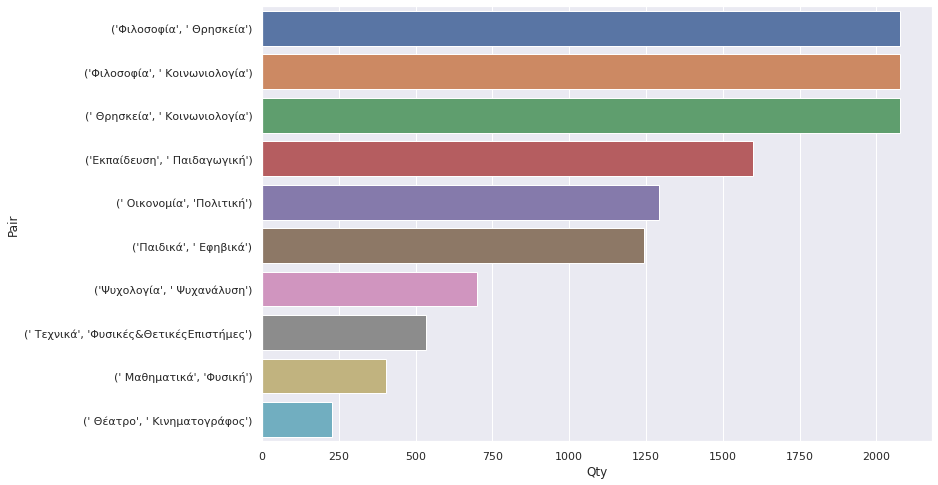

In [19]:
plt.figure(figsize=[12,8])
sns.set()
sns.barplot(data=df1.head(10), x='Qty', y='Pair')
plt.show()